RMSE after 100 training steps is [0.36402902]
RMSE after 200 training steps is [0.46548325]
RMSE after 300 training steps is [0.52118894]
RMSE after 400 training steps is [0.56051405]
RMSE after 500 training steps is [0.60420814]
RMSE after 600 training steps is [0.64318646]
RMSE after 700 training steps is [0.66431094]
RMSE after 800 training steps is [0.67672944]
RMSE after 900 training steps is [0.68347657]


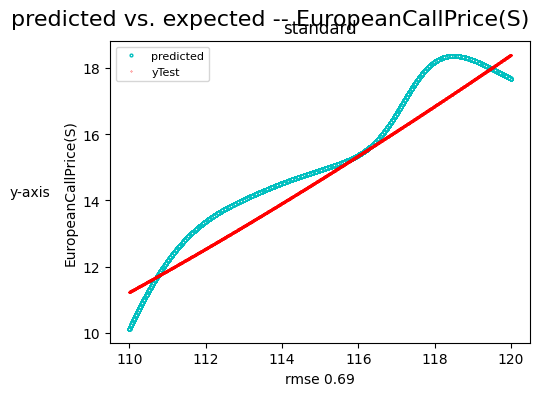

In [3]:
### Copy of Main.py as a juypter notebook to visualize results

#del sys.modules['DataImporter']

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data Generator/Importer
###

# 10^4 data data points
Generator = GBM(GBM_Case.Standard)
Generator.set_inputName('S')
Generator.set_outputName('EuropeanCallPrice(S)')

###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(50)
Regressor.set_hiddenLayers(2)
Regressor.set_activationFunctionsHidden(tf.nn.sigmoid)
Regressor.set_activationFunctionOutput(tf.nn.sigmoid)
Regressor.set_weight_seed(1)

#hiddenNeurons = 20               # we use equal neurons for each hidden layer
#hiddenLayers = 3                # amount of hidden layers
#activationFunctionsHidden = [tf.nn.tanh]   # activation functions of hidden layers


###
### 3. Set Nueral network structure / Hyperparameters
### 

TrainSettings = TrainingSettings()
TrainSettings.set_learning_rate_schedule=([(0.0, 0.001),(0.333, 0.0001),(0.666, 0.0001)])
TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(100)
TrainSettings.set_nTest(20000)
TrainSettings.set_samplesPerStep(2000)
TrainSettings.set_trainingSteps(1000)


###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("predicted vs. expected", yPredicted, xTest, yTest, Generator)

RMSE after 100 training steps is [0.70516776]
RMSE after 200 training steps is [0.68216721]
RMSE after 300 training steps is [0.33523476]
RMSE after 400 training steps is [0.33806171]
RMSE after 500 training steps is [0.33969335]
RMSE after 600 training steps is [0.35283666]
RMSE after 700 training steps is [0.3754224]
RMSE after 800 training steps is [0.38824602]
RMSE after 900 training steps is [0.40752684]


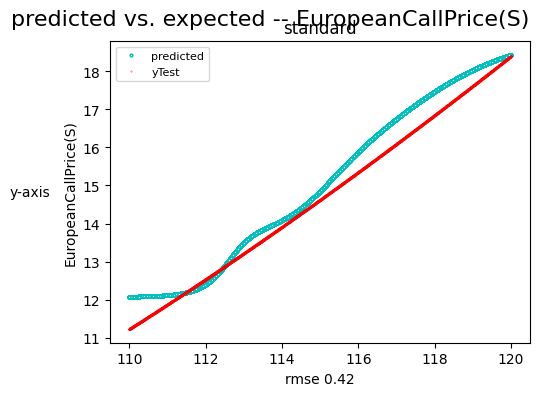

In [2]:
Generator.set_trainingCase(GBM_Case.VarianceReduced)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("predicted vs. expected", yPredicted, xTest, yTest, Generator)